In [1]:
!pip install keras
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np

In [3]:
ffire = pd.read_csv("C:\\Users\\91915\\Downloads\\forestfires (1).csv")
ffire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# EDA

In [5]:
ffire.shape   # Rows and columns

(517, 31)

In [6]:
ffire.columns     # columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [7]:
# Rename columns
ffire.columns = ['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'fri', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', 'apr', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep', 'size_category']

In [8]:
# Drop columns
ffire.drop(['fri', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', 'apr', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep'], axis = 1, inplace = True)

In [9]:
ffire.columns   # Check colum names

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

In [10]:
ffire.index      # Rows

RangeIndex(start=0, stop=517, step=1)

In [11]:
ffire.info()    # Data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [12]:
ffire.describe().T   # Discripttive statistics  # Here T is for Transformation

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


In [13]:
ffire.isna().sum()   # Checking null values, there is no null values present in given dataset

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [14]:
ffire['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [15]:
ffire['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [16]:
ffire[ffire.duplicated()]   # In this dataset very few duplicate values, it may not effect major on prediction.

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


In [17]:
ffire.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


# Visualization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

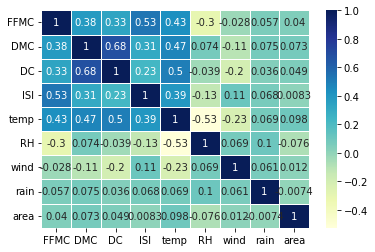

In [19]:
sns.heatmap(ffire.corr(), cmap = "YlGnBu", linewidth = 1, annot = True)  # annot= True for label the values
plt.show()

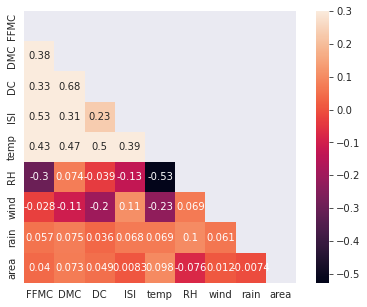

In [20]:
corr = ffire.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):  # Styel must be: white, whitegrid, dark, darkgrid.
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr,mask=mask, vmax=.3, square=True, annot = True)

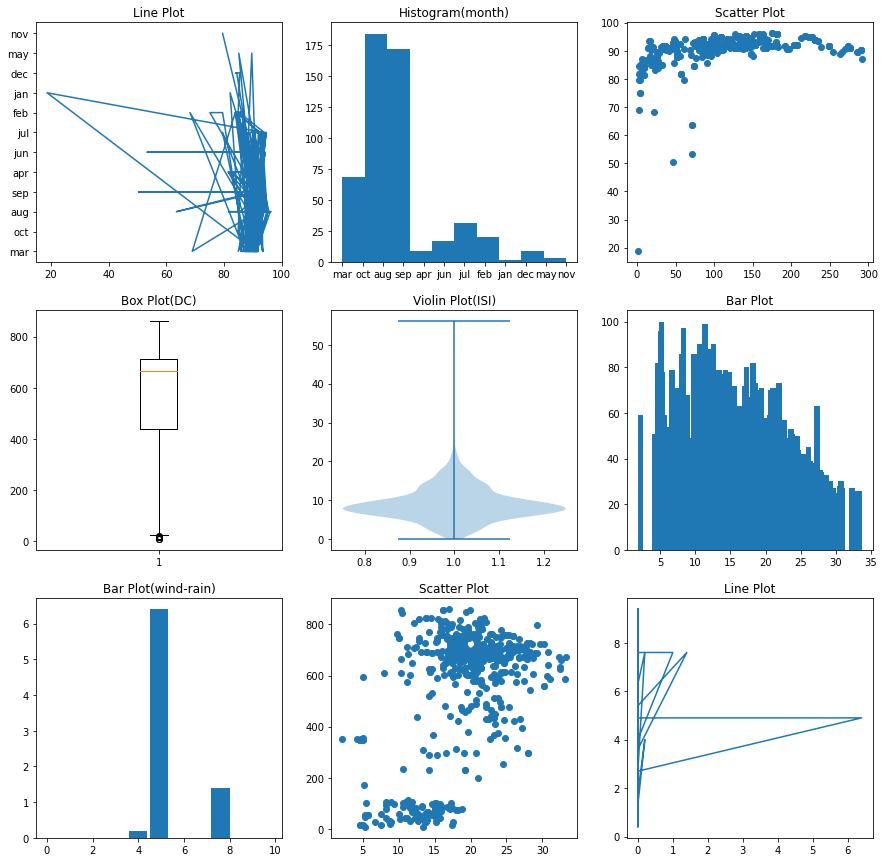

In [21]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize =(15,15))
ax[0,0].plot('FFMC','month', data = ffire);ax[0,0].set_title("Line Plot")
ax[0,1].hist('month', data = ffire);ax[0,1].set_title("Histogram(month)")
ax[0,2].scatter('DMC', 'FFMC', data = ffire);ax[0,2].set_title("Scatter Plot")
ax[1,0].boxplot('DC', data = ffire);ax[1,0].set_title("Box Plot(DC)")
ax[1,1].violinplot('ISI', data = ffire);ax[1,1].set_title("Violin Plot(ISI)")
ax[1,2].bar('temp','RH', data = ffire);ax[1,2].set_title("Bar Plot")
ax[2,0].bar(ffire['wind'], ffire["rain"]);ax[2,0].set_title("Bar Plot(wind-rain)")
ax[2,1].scatter('temp','DC', data = ffire);ax[2,1].set_title("Scatter Plot")
ax[2,2].plot('rain','wind', data = ffire);ax[2,2].set_title("Line Plot")
plt.show()

D:\anaconda\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


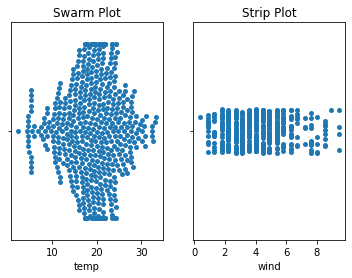

In [22]:
plt.subplot(1,2,1)
sns.swarmplot(x = 'temp', data = ffire);plt.title("Swarm Plot")
plt.subplot(1,2,2)
sns.stripplot( x = 'wind', data = ffire);plt.title("Strip Plot")
plt.show()

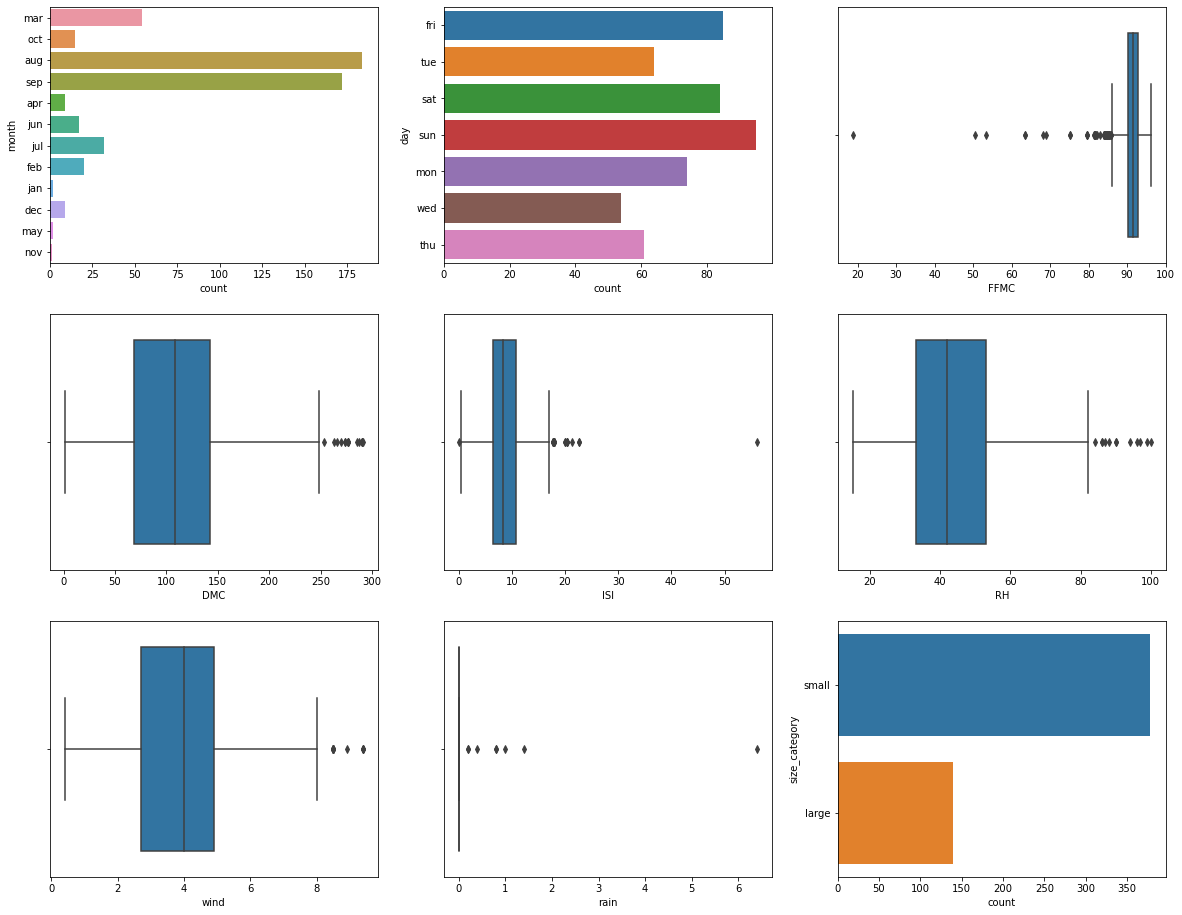

In [23]:
plt.subplots(figsize=(20,16))
[plt.subplot(3,3,1), sns.countplot(data=ffire, y='month')];

[plt.subplot(3,3,2), sns.countplot(data=ffire, y='day')];

[plt.subplot(3,3,3), sns.boxplot(x=ffire["FFMC"])];

[plt.subplot(3,3,4), sns.boxplot(x=ffire["DMC"])];

[plt.subplot(3,3,5), sns.boxplot(x=ffire["ISI"])];

[plt.subplot(3,3,6), sns.boxplot(x=ffire["RH"])];

[plt.subplot(3,3,7), sns.boxplot(x=ffire["wind"])];

[plt.subplot(3,3,8), sns.boxplot(x=ffire["rain"])];

[plt.subplot(3,3,9), sns.countplot(data=ffire, y='size_category')];
plt.show()

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


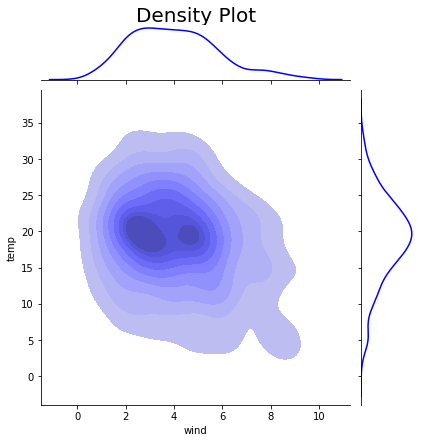

In [24]:
sns.jointplot(x = 'wind', y='temp', data = ffire, kind= 'kde', shade = True, color = 'blue')  # shade = True: filed with color shape
plt.title("Density Plot", size = 20, y= 1.2)
plt.show()

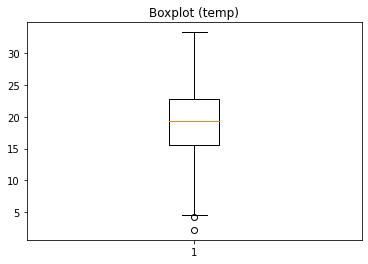

In [25]:
# Boxplot for outlier detection
plt.boxplot(ffire['temp']); plt.title("Boxplot (temp)")
plt.show()

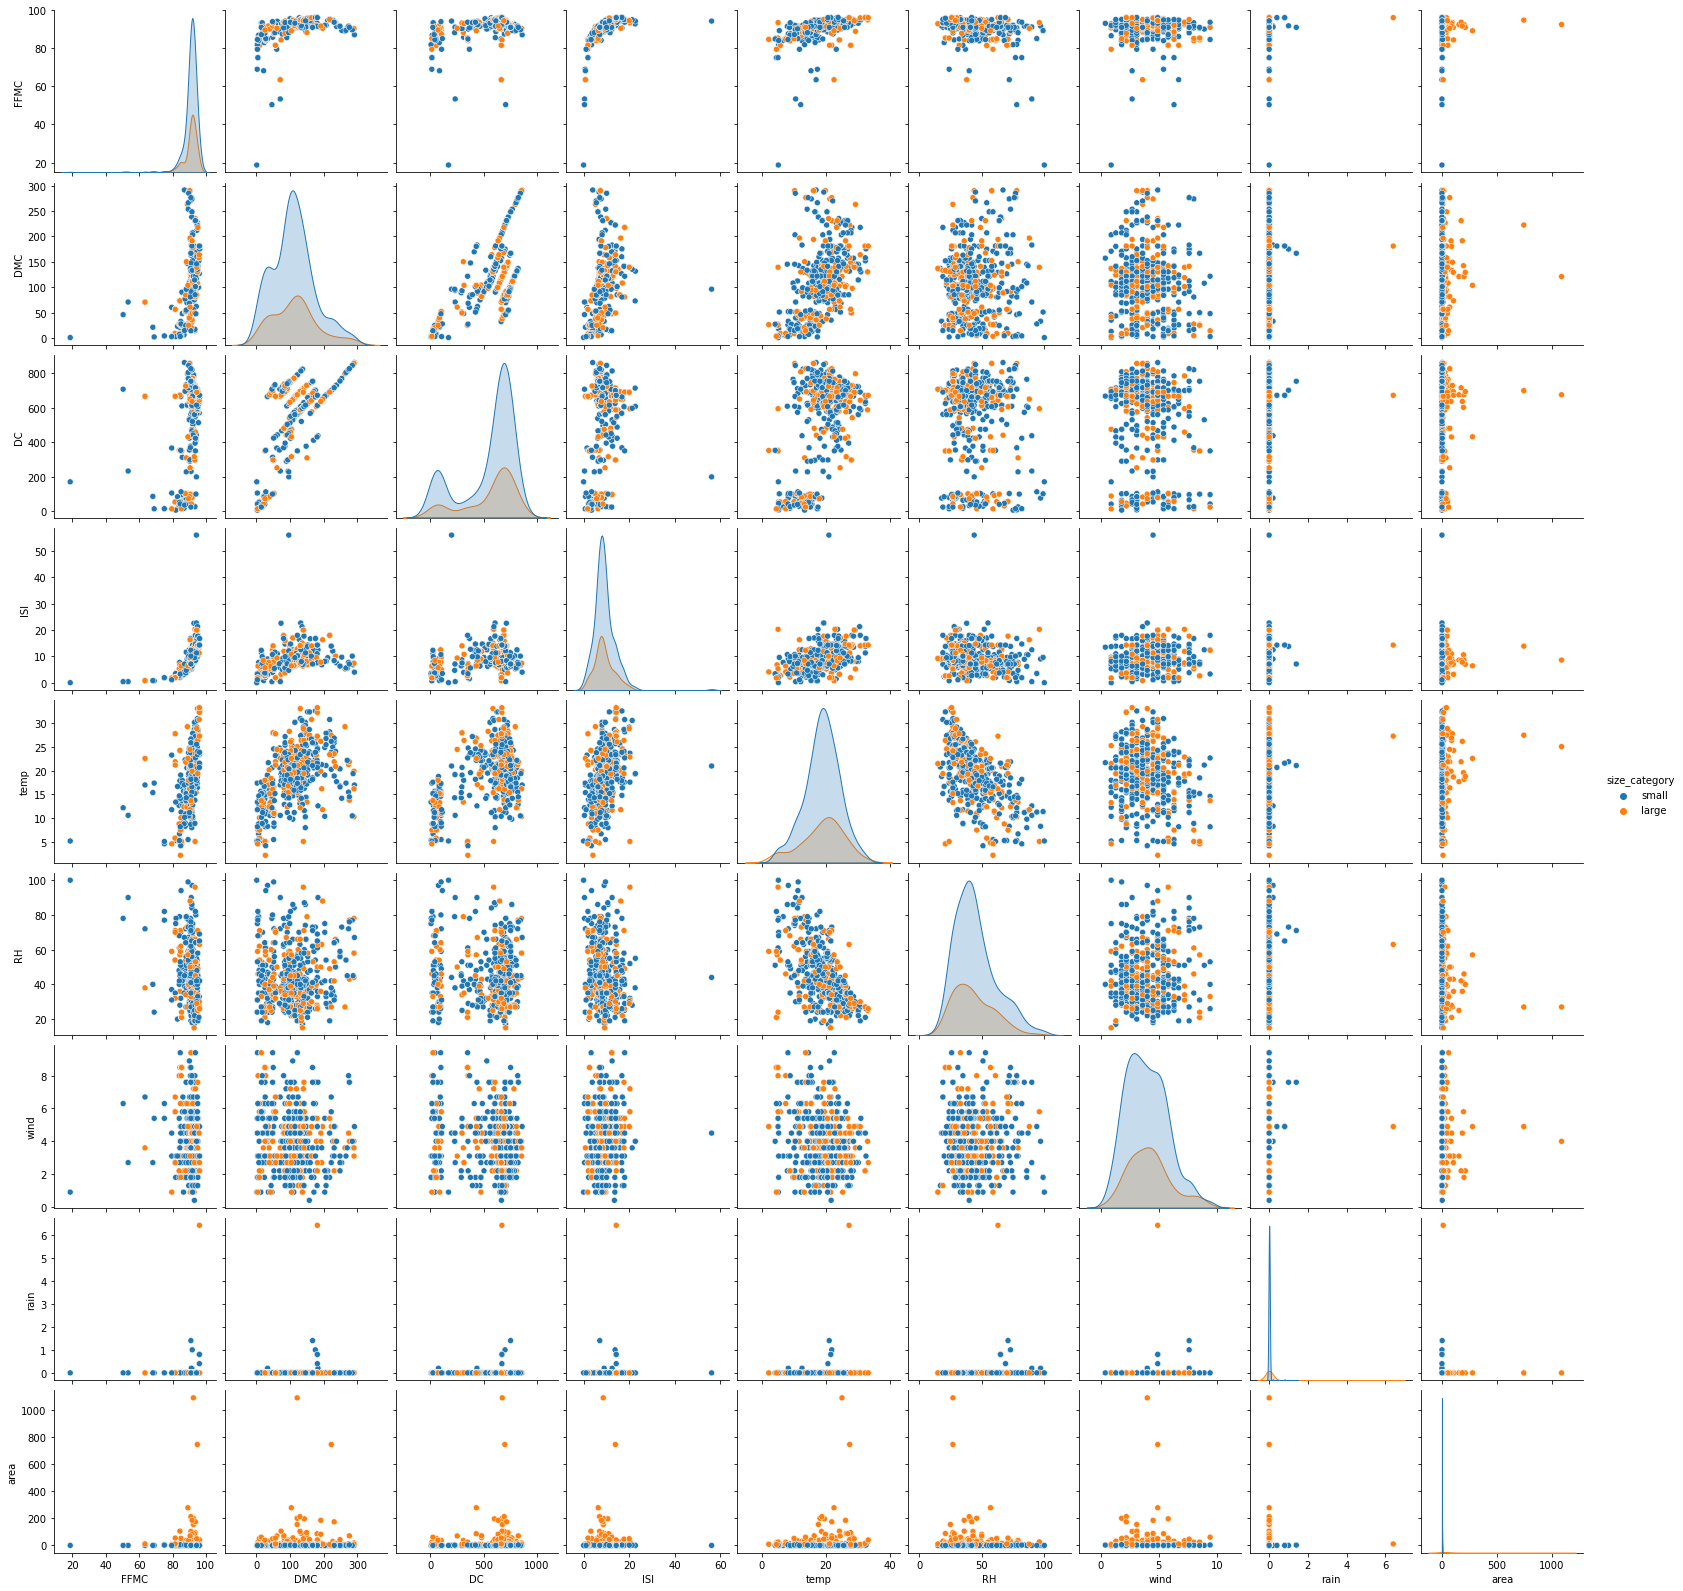

In [26]:
# Plotting pairplot for visualize all the attributes in one plot
sns.pairplot(ffire, hue = 'size_category')
plt.show()

# Neural network

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM    # we can use LSTM instead if Dense
from sklearn import preprocessing  

In [28]:
# Convert all the categorical variables to numeric
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
ffire['month'] = LE.fit_transform(ffire['month'])
ffire['day'] = LE.fit_transform(ffire['day'])
ffire['size_category'] = LE.fit_transform(ffire['size_category'])

In [29]:
X = ffire.iloc[:,2:-1]
Y = ffire.iloc[:,-1]
print(Y)
X

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [30]:
# Architecture
model = Sequential()
model.add(Dense(12, input_dim = 9, activation = "relu", name = 'input_layer_Dense'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = "sigmoid"))

In [31]:
# Compile Model

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_Dense (Dense)   (None, 12)                120       
                                                                 
 dense (Dense)               (None, 8)                 104       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Fit the model
fit_model = model.fit(X, Y, validation_split = 0.33 , epochs = 250, batch_size = 10)

Epoch 1/250
35/35 [==============================] - 4s 41ms/step - loss: 156.1713 - accuracy: 0.2630 - val_loss: 109.5969 - val_accuracy: 0.3918
Epoch 2/250
35/35 [==============================] - 1s 28ms/step - loss: 67.7882 - accuracy: 0.3410 - val_loss: 18.6475 - val_accuracy: 0.3801
Epoch 3/250
35/35 [==============================] - 1s 24ms/step - loss: 6.0926 - accuracy: 0.6908 - val_loss: 6.1627 - val_accuracy: 0.7018
Epoch 4/250
35/35 [==============================] - 1s 24ms/step - loss: 2.8909 - accuracy: 0.7370 - val_loss: 3.4832 - val_accuracy: 0.7368
Epoch 5/250
35/35 [==============================] - 1s 27ms/step - loss: 2.5860 - accuracy: 0.7601 - val_loss: 2.9079 - val_accuracy: 0.7485
Epoch 6/250
35/35 [==============================] - 1s 27ms/step - loss: 2.2589 - accuracy: 0.7543 - val_loss: 3.2213 - val_accuracy: 0.7427
Epoch 7/250
35/35 [==============================] - 1s 27ms/step - loss: 1.7176 - accuracy: 0.7659 - val_loss: 2.7786 - val_accuracy: 0.7427


35/35 [==============================] - 1s 32ms/step - loss: 0.1084 - accuracy: 0.9566 - val_loss: 0.4526 - val_accuracy: 0.8947
Epoch 59/250
35/35 [==============================] - 1s 37ms/step - loss: 0.0508 - accuracy: 0.9827 - val_loss: 0.3428 - val_accuracy: 0.8947
Epoch 60/250
35/35 [==============================] - 1s 32ms/step - loss: 0.0485 - accuracy: 0.9855 - val_loss: 0.4833 - val_accuracy: 0.8889
Epoch 61/250
35/35 [==============================] - 1s 36ms/step - loss: 0.0437 - accuracy: 0.9913 - val_loss: 0.3893 - val_accuracy: 0.9006
Epoch 62/250
35/35 [==============================] - 1s 25ms/step - loss: 0.0551 - accuracy: 0.9740 - val_loss: 0.4753 - val_accuracy: 0.8889
Epoch 63/250
35/35 [==============================] - 1s 25ms/step - loss: 0.0508 - accuracy: 0.9827 - val_loss: 0.4635 - val_accuracy: 0.8947
Epoch 64/250
35/35 [==============================] - 1s 26ms/step - loss: 0.0508 - accuracy: 0.9769 - val_loss: 0.3634 - val_accuracy: 0.9064
Epoch 65/250

35/35 [==============================] - 1s 26ms/step - loss: 0.0323 - accuracy: 0.9913 - val_loss: 0.2960 - val_accuracy: 0.9298
Epoch 116/250
35/35 [==============================] - 1s 29ms/step - loss: 0.0249 - accuracy: 0.9884 - val_loss: 0.2332 - val_accuracy: 0.9298
Epoch 117/250
35/35 [==============================] - 1s 26ms/step - loss: 0.0498 - accuracy: 0.9827 - val_loss: 0.2347 - val_accuracy: 0.9240
Epoch 118/250
35/35 [==============================] - 1s 25ms/step - loss: 0.0279 - accuracy: 0.9884 - val_loss: 0.2616 - val_accuracy: 0.9240
Epoch 119/250
35/35 [==============================] - 1s 25ms/step - loss: 0.0270 - accuracy: 0.9855 - val_loss: 0.3935 - val_accuracy: 0.9181
Epoch 120/250
35/35 [==============================] - 1s 25ms/step - loss: 0.0426 - accuracy: 0.9798 - val_loss: 0.2286 - val_accuracy: 0.9298
Epoch 121/250
35/35 [==============================] - 1s 32ms/step - loss: 0.0346 - accuracy: 0.9855 - val_loss: 0.3490 - val_accuracy: 0.9298
Epoch 

Epoch 172/250
35/35 [==============================] - 1s 28ms/step - loss: 0.0392 - accuracy: 0.9798 - val_loss: 0.2049 - val_accuracy: 0.9357
Epoch 173/250
35/35 [==============================] - 1s 31ms/step - loss: 0.0342 - accuracy: 0.9913 - val_loss: 0.1822 - val_accuracy: 0.9474
Epoch 174/250
35/35 [==============================] - 1s 30ms/step - loss: 0.0229 - accuracy: 0.9884 - val_loss: 0.4986 - val_accuracy: 0.9298
Epoch 175/250
35/35 [==============================] - 1s 28ms/step - loss: 0.1067 - accuracy: 0.9682 - val_loss: 0.2391 - val_accuracy: 0.9298
Epoch 176/250
35/35 [==============================] - 1s 30ms/step - loss: 0.0541 - accuracy: 0.9827 - val_loss: 0.2088 - val_accuracy: 0.9298
Epoch 177/250
35/35 [==============================] - 1s 33ms/step - loss: 0.0218 - accuracy: 0.9913 - val_loss: 0.2788 - val_accuracy: 0.9415
Epoch 178/250
35/35 [==============================] - 1s 29ms/step - loss: 0.0150 - accuracy: 0.9971 - val_loss: 0.2092 - val_accuracy:

Epoch 229/250
35/35 [==============================] - 1s 29ms/step - loss: 0.0426 - accuracy: 0.9798 - val_loss: 0.1571 - val_accuracy: 0.9649
Epoch 230/250
35/35 [==============================] - 1s 26ms/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.3563 - val_accuracy: 0.9415
Epoch 231/250
35/35 [==============================] - 1s 26ms/step - loss: 0.0264 - accuracy: 0.9855 - val_loss: 0.2182 - val_accuracy: 0.9474
Epoch 232/250
35/35 [==============================] - 1s 25ms/step - loss: 0.0136 - accuracy: 0.9971 - val_loss: 0.1441 - val_accuracy: 0.9591
Epoch 233/250
35/35 [==============================] - 1s 29ms/step - loss: 0.0377 - accuracy: 0.9855 - val_loss: 0.2018 - val_accuracy: 0.9474
Epoch 234/250
35/35 [==============================] - 1s 30ms/step - loss: 0.0201 - accuracy: 0.9913 - val_loss: 0.1689 - val_accuracy: 0.9415
Epoch 235/250
35/35 [==============================] - 1s 27ms/step - loss: 0.0172 - accuracy: 0.9942 - val_loss: 0.1925 - val_accuracy:

In [34]:
# Fit the model
fit_model = model.fit(X, Y, validation_split = 0.33 , epochs = 250, batch_size = 10)

Epoch 1/250
35/35 [==============================] - 2s 29ms/step - loss: 0.0337 - accuracy: 0.9855 - val_loss: 0.0987 - val_accuracy: 0.9708
Epoch 2/250
35/35 [==============================] - 1s 26ms/step - loss: 0.0207 - accuracy: 0.9942 - val_loss: 0.1024 - val_accuracy: 0.9591
Epoch 3/250
35/35 [==============================] - 1s 26ms/step - loss: 0.0294 - accuracy: 0.9884 - val_loss: 0.0995 - val_accuracy: 0.9591
Epoch 4/250
35/35 [==============================] - 1s 29ms/step - loss: 0.0216 - accuracy: 0.9971 - val_loss: 0.1283 - val_accuracy: 0.9649
Epoch 5/250
35/35 [==============================] - 1s 32ms/step - loss: 0.0162 - accuracy: 0.9942 - val_loss: 0.1033 - val_accuracy: 0.9591
Epoch 6/250
35/35 [==============================] - 1s 29ms/step - loss: 0.0410 - accuracy: 0.9798 - val_loss: 0.2337 - val_accuracy: 0.9415
Epoch 7/250
35/35 [==============================] - 1s 30ms/step - loss: 0.0344 - accuracy: 0.9913 - val_loss: 0.1208 - val_accuracy: 0.9591
Epoch 

35/35 [==============================] - 1s 26ms/step - loss: 0.0757 - accuracy: 0.9855 - val_loss: 0.2264 - val_accuracy: 0.9532
Epoch 59/250
35/35 [==============================] - 1s 30ms/step - loss: 0.0270 - accuracy: 0.9884 - val_loss: 0.3031 - val_accuracy: 0.9474
Epoch 60/250
35/35 [==============================] - 1s 26ms/step - loss: 0.0220 - accuracy: 0.9855 - val_loss: 0.2097 - val_accuracy: 0.9357
Epoch 61/250
35/35 [==============================] - 1s 24ms/step - loss: 0.0329 - accuracy: 0.9913 - val_loss: 0.2047 - val_accuracy: 0.9415
Epoch 62/250
35/35 [==============================] - 1s 25ms/step - loss: 0.0517 - accuracy: 0.9798 - val_loss: 0.4389 - val_accuracy: 0.9415
Epoch 63/250
35/35 [==============================] - 1s 29ms/step - loss: 0.0149 - accuracy: 0.9942 - val_loss: 0.2992 - val_accuracy: 0.9415
Epoch 64/250
35/35 [==============================] - 1s 28ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.1988 - val_accuracy: 0.9532
Epoch 65/250

35/35 [==============================] - 1s 26ms/step - loss: 0.0148 - accuracy: 0.9913 - val_loss: 0.2864 - val_accuracy: 0.9474
Epoch 116/250
35/35 [==============================] - 1s 25ms/step - loss: 0.0227 - accuracy: 0.9942 - val_loss: 0.2468 - val_accuracy: 0.9357
Epoch 117/250
35/35 [==============================] - 1s 23ms/step - loss: 0.0191 - accuracy: 0.9913 - val_loss: 0.2085 - val_accuracy: 0.9474
Epoch 118/250
35/35 [==============================] - 1s 26ms/step - loss: 0.0225 - accuracy: 0.9884 - val_loss: 0.9042 - val_accuracy: 0.8947
Epoch 119/250
35/35 [==============================] - 1s 29ms/step - loss: 0.1314 - accuracy: 0.9711 - val_loss: 0.2487 - val_accuracy: 0.9532
Epoch 120/250
35/35 [==============================] - 1s 30ms/step - loss: 0.0527 - accuracy: 0.9827 - val_loss: 0.1053 - val_accuracy: 0.9532
Epoch 121/250
35/35 [==============================] - 1s 26ms/step - loss: 0.0317 - accuracy: 0.9827 - val_loss: 0.1322 - val_accuracy: 0.9532
Epoch 

Epoch 172/250
35/35 [==============================] - 1s 30ms/step - loss: 0.0107 - accuracy: 0.9913 - val_loss: 0.2052 - val_accuracy: 0.9474
Epoch 173/250
35/35 [==============================] - 1s 29ms/step - loss: 0.0266 - accuracy: 0.9884 - val_loss: 0.1427 - val_accuracy: 0.9649
Epoch 174/250
35/35 [==============================] - 1s 30ms/step - loss: 0.0247 - accuracy: 0.9884 - val_loss: 0.1230 - val_accuracy: 0.9649
Epoch 175/250
35/35 [==============================] - 1s 28ms/step - loss: 0.0242 - accuracy: 0.9855 - val_loss: 0.1206 - val_accuracy: 0.9649
Epoch 176/250
35/35 [==============================] - 1s 25ms/step - loss: 0.0173 - accuracy: 0.9942 - val_loss: 0.1185 - val_accuracy: 0.9649
Epoch 177/250
35/35 [==============================] - 1s 25ms/step - loss: 0.0166 - accuracy: 0.9884 - val_loss: 0.1206 - val_accuracy: 0.9649
Epoch 178/250
35/35 [==============================] - 1s 25ms/step - loss: 0.0307 - accuracy: 0.9855 - val_loss: 0.1887 - val_accuracy:

Epoch 229/250
35/35 [==============================] - 1s 26ms/step - loss: 0.0470 - accuracy: 0.9855 - val_loss: 0.1239 - val_accuracy: 0.9591
Epoch 230/250
35/35 [==============================] - 1s 24ms/step - loss: 0.0136 - accuracy: 0.9942 - val_loss: 0.1003 - val_accuracy: 0.9591
Epoch 231/250
35/35 [==============================] - 1s 28ms/step - loss: 0.0159 - accuracy: 0.9913 - val_loss: 0.1162 - val_accuracy: 0.9649
Epoch 232/250
35/35 [==============================] - 1s 26ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.0987 - val_accuracy: 0.9708
Epoch 233/250
35/35 [==============================] - 1s 24ms/step - loss: 0.0209 - accuracy: 0.9913 - val_loss: 0.1449 - val_accuracy: 0.9591
Epoch 234/250
35/35 [==============================] - 1s 25ms/step - loss: 0.0194 - accuracy: 0.9942 - val_loss: 0.1122 - val_accuracy: 0.9591
Epoch 235/250
35/35 [==============================] - 1s 26ms/step - loss: 0.0162 - accuracy: 0.9942 - val_loss: 0.1121 - val_accuracy:

In [35]:
# Evaluating the Model
score1 = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], score1[1]*100))

17/17 [==============================] - 1s 2ms/step - loss: 0.1188 - accuracy: 0.9652 
accuracy: 96.52%


In [36]:
model.metrics_names

['loss', 'accuracy']

In [37]:
# Visualzation of Training History
fit_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
fit_model.history['accuracy']

[0.9855491518974304,
 0.9942196607589722,
 0.9884393215179443,
 0.9971098303794861,
 0.9942196607589722,
 0.9797688126564026,
 0.9913294911384583,
 0.9710982441902161,
 0.9710982441902161,
 0.9855491518974304,
 0.9826589822769165,
 0.9913294911384583,
 0.9855491518974304,
 0.9797688126564026,
 0.9826589822769165,
 0.9768785834312439,
 0.9913294911384583,
 0.9855491518974304,
 0.9884393215179443,
 0.9942196607589722,
 0.9913294911384583,
 0.9884393215179443,
 0.9913294911384583,
 0.9913294911384583,
 0.9768785834312439,
 0.97398841381073,
 0.9826589822769165,
 0.9826589822769165,
 0.9971098303794861,
 0.9942196607589722,
 0.9797688126564026,
 0.9797688126564026,
 0.9971098303794861,
 0.9855491518974304,
 0.9682080745697021,
 0.9826589822769165,
 0.9826589822769165,
 0.9913294911384583,
 0.9913294911384583,
 0.9942196607589722,
 0.9913294911384583,
 0.9942196607589722,
 1.0,
 0.9942196607589722,
 0.9942196607589722,
 0.9942196607589722,
 0.9971098303794861,
 0.9971098303794861,
 0.988439

In [39]:
fit_model.history['val_accuracy']

[0.9707602262496948,
 0.9590643048286438,
 0.9590643048286438,
 0.9649122953414917,
 0.9590643048286438,
 0.9415204524993896,
 0.9590643048286438,
 0.9415204524993896,
 0.9473684430122375,
 0.9707602262496948,
 0.9649122953414917,
 0.9707602262496948,
 0.9239766001701355,
 0.9590643048286438,
 0.9415204524993896,
 0.9415204524993896,
 0.9649122953414917,
 0.9415204524993896,
 0.9532163739204407,
 0.9532163739204407,
 0.9590643048286438,
 0.9649122953414917,
 0.9473684430122375,
 0.9590643048286438,
 0.9122806787490845,
 0.9415204524993896,
 0.9473684430122375,
 0.9473684430122375,
 0.9532163739204407,
 0.9473684430122375,
 0.9532163739204407,
 0.9473684430122375,
 0.9590643048286438,
 0.9473684430122375,
 0.9356725215911865,
 0.9415204524993896,
 0.9532163739204407,
 0.9415204524993896,
 0.9473684430122375,
 0.9532163739204407,
 0.9590643048286438,
 0.9590643048286438,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430

In [40]:
fit_model.history['loss'] 

[0.03369368612766266,
 0.020693987607955933,
 0.029445987194776535,
 0.021580848842859268,
 0.01619703508913517,
 0.04098803922533989,
 0.03442230820655823,
 0.09044255316257477,
 0.0856204554438591,
 0.041859764605760574,
 0.05049600824713707,
 0.026418687775731087,
 0.058287642896175385,
 0.03999308496713638,
 0.03289506211876869,
 0.10141588747501373,
 0.03743060305714607,
 0.03309745714068413,
 0.03332613408565521,
 0.021481281146407127,
 0.03200893476605415,
 0.024336546659469604,
 0.021655946969985962,
 0.03882914409041405,
 0.05486597865819931,
 0.12929445505142212,
 0.0408618226647377,
 0.06816759705543518,
 0.013746345415711403,
 0.014805172570049763,
 0.04941056668758392,
 0.07116422802209854,
 0.0175767932087183,
 0.044055063277482986,
 0.09113764017820358,
 0.05927129462361336,
 0.04955604299902916,
 0.027076203376054764,
 0.021657563745975494,
 0.023701347410678864,
 0.01744817942380905,
 0.021744830533862114,
 0.005207940470427275,
 0.01534522045403719,
 0.016119148582220

In [41]:
fit_model.history['val_loss']

[0.09871614724397659,
 0.10235225409269333,
 0.09950283169746399,
 0.1282840371131897,
 0.10332375019788742,
 0.23366345465183258,
 0.12077073007822037,
 0.2567361295223236,
 0.1671881079673767,
 0.13667453825473785,
 0.1248052716255188,
 0.1368202567100525,
 0.4909185767173767,
 0.14232592284679413,
 0.2899508476257324,
 0.4113238453865051,
 0.12394056469202042,
 0.24066270887851715,
 0.16381646692752838,
 0.16893352568149567,
 0.13323794305324554,
 0.13862328231334686,
 0.24640697240829468,
 0.13430434465408325,
 0.6508453488349915,
 0.4198988974094391,
 0.21630267798900604,
 0.20274701714515686,
 0.15392866730690002,
 0.23197965323925018,
 0.19914191961288452,
 0.1572272628545761,
 0.15114374458789825,
 0.31417399644851685,
 0.19892770051956177,
 0.3616749942302704,
 0.15432168543338776,
 0.18650837242603302,
 0.29146909713745117,
 0.19964589178562164,
 0.12889082729816437,
 0.13363315165042877,
 0.23358148336410522,
 0.20022211968898773,
 0.2469102293252945,
 0.1608690619468689,
 0

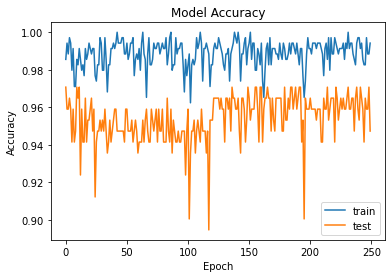

In [42]:
 # summarizaion of history for accuracy
plt.plot(fit_model.history['accuracy'])
plt.plot(fit_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

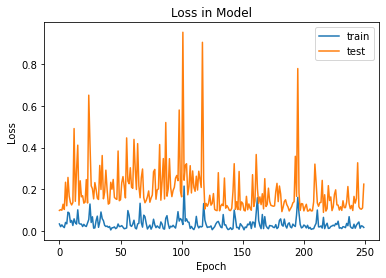

In [43]:
# # summarization of history for 'loss'
plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.title('Loss in Model')
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [44]:
predictions = model.predict(X)

17/17 [==============================] - 1s 2ms/step


#  Making Another model with changing Activation functions and Mini-Batch Gradient(optimizer)

In [45]:
# fix random seed for reproducibility
seed2 = 9
np.random.seed(seed2)

In [46]:
# creating model with ["linear" and "sigmoid"]

model2 = Sequential() # 0 level
model2.add(Dense(14, input_dim=9,  activation='linear')) #1st layer
model2.add(Dense(9,  activation='linear')) #2nd layer
model2.add(Dense(1, activation='sigmoid')) #3rd layer or op layer

In [47]:
# Compile model
# chaging optimizer older=ada, new=adadelta

model2.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])


In [48]:
# Fit the model
# Change ephocs from 250 to 200

fit_model2=model2.fit(X,Y, validation_split=0.33, epochs=200, batch_size=10)

Epoch 1/200
35/35 [==============================] - 3s 36ms/step - loss: 3.9009 - accuracy: 0.6301 - val_loss: 11.7919 - val_accuracy: 0.4678
Epoch 2/200
35/35 [==============================] - 1s 31ms/step - loss: 3.8521 - accuracy: 0.6329 - val_loss: 11.6733 - val_accuracy: 0.4678
Epoch 3/200
35/35 [==============================] - 1s 30ms/step - loss: 3.8087 - accuracy: 0.6329 - val_loss: 11.5648 - val_accuracy: 0.4678
Epoch 4/200
35/35 [==============================] - 1s 31ms/step - loss: 3.7714 - accuracy: 0.6358 - val_loss: 11.4626 - val_accuracy: 0.4678
Epoch 5/200
35/35 [==============================] - 1s 29ms/step - loss: 3.7383 - accuracy: 0.6503 - val_loss: 11.3701 - val_accuracy: 0.4678
Epoch 6/200
35/35 [==============================] - 1s 26ms/step - loss: 3.7102 - accuracy: 0.6474 - val_loss: 11.2805 - val_accuracy: 0.4678
Epoch 7/200
35/35 [==============================] - 1s 27ms/step - loss: 3.6837 - accuracy: 0.6532 - val_loss: 11.1943 - val_accuracy: 0.4678

35/35 [==============================] - 1s 26ms/step - loss: 3.4040 - accuracy: 0.6965 - val_loss: 9.7243 - val_accuracy: 0.4737
Epoch 59/200
35/35 [==============================] - 1s 31ms/step - loss: 3.4021 - accuracy: 0.6965 - val_loss: 9.7173 - val_accuracy: 0.4737
Epoch 60/200
35/35 [==============================] - 1s 34ms/step - loss: 3.4002 - accuracy: 0.6965 - val_loss: 9.7122 - val_accuracy: 0.4737
Epoch 61/200
35/35 [==============================] - 1s 34ms/step - loss: 3.3979 - accuracy: 0.6965 - val_loss: 9.7013 - val_accuracy: 0.4737
Epoch 62/200
35/35 [==============================] - 1s 30ms/step - loss: 3.3968 - accuracy: 0.6965 - val_loss: 9.6973 - val_accuracy: 0.4737
Epoch 63/200
35/35 [==============================] - 1s 33ms/step - loss: 3.3945 - accuracy: 0.6965 - val_loss: 9.6904 - val_accuracy: 0.4737
Epoch 64/200
35/35 [==============================] - 1s 33ms/step - loss: 3.3928 - accuracy: 0.6965 - val_loss: 9.6875 - val_accuracy: 0.4737
Epoch 65/200

35/35 [==============================] - 1s 23ms/step - loss: 3.2934 - accuracy: 0.6965 - val_loss: 9.3616 - val_accuracy: 0.4737
Epoch 116/200
35/35 [==============================] - 1s 24ms/step - loss: 3.2919 - accuracy: 0.6965 - val_loss: 9.3564 - val_accuracy: 0.4737
Epoch 117/200
35/35 [==============================] - 1s 33ms/step - loss: 3.2897 - accuracy: 0.6965 - val_loss: 9.3519 - val_accuracy: 0.4737
Epoch 118/200
35/35 [==============================] - 1s 36ms/step - loss: 3.2878 - accuracy: 0.6965 - val_loss: 9.3488 - val_accuracy: 0.4737
Epoch 119/200
35/35 [==============================] - 1s 31ms/step - loss: 3.2860 - accuracy: 0.6965 - val_loss: 9.3418 - val_accuracy: 0.4737
Epoch 120/200
35/35 [==============================] - 1s 31ms/step - loss: 3.2839 - accuracy: 0.6965 - val_loss: 9.3396 - val_accuracy: 0.4737
Epoch 121/200
35/35 [==============================] - 1s 26ms/step - loss: 3.2823 - accuracy: 0.6965 - val_loss: 9.3305 - val_accuracy: 0.4737
Epoch 

Epoch 172/200
35/35 [==============================] - 1s 34ms/step - loss: 3.1858 - accuracy: 0.6965 - val_loss: 9.0261 - val_accuracy: 0.4737
Epoch 173/200
35/35 [==============================] - 1s 32ms/step - loss: 3.1839 - accuracy: 0.6965 - val_loss: 9.0197 - val_accuracy: 0.4737
Epoch 174/200
35/35 [==============================] - 1s 36ms/step - loss: 3.1819 - accuracy: 0.6994 - val_loss: 9.0155 - val_accuracy: 0.4737
Epoch 175/200
35/35 [==============================] - 1s 34ms/step - loss: 3.1800 - accuracy: 0.6994 - val_loss: 9.0070 - val_accuracy: 0.4737
Epoch 176/200
35/35 [==============================] - 1s 29ms/step - loss: 3.1783 - accuracy: 0.6994 - val_loss: 8.9986 - val_accuracy: 0.4737
Epoch 177/200
35/35 [==============================] - 1s 27ms/step - loss: 3.1761 - accuracy: 0.6994 - val_loss: 8.9922 - val_accuracy: 0.4737
Epoch 178/200
35/35 [==============================] - 1s 26ms/step - loss: 3.1743 - accuracy: 0.6994 - val_loss: 8.9851 - val_accuracy:

In [49]:
# Evaluating the Model

score2 = model2.evaluate(X,Y)
print("%s: %.2f%%" % (model2.metrics_names[1], score2[1]*100))

17/17 [==============================] - 1s 4ms/step - loss: 5.0261 - accuracy: 0.6248
accuracy: 62.48%


In [50]:
# Visualzation of Training History, metric name and score

model2.metrics_names, score2 , fit_model2.history.keys()

(['loss', 'accuracy'],
 [5.026144981384277, 0.624758243560791],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

In [51]:
fit_model2.history['accuracy'] 

[0.6300578117370605,
 0.6329479813575745,
 0.6329479813575745,
 0.6358381509780884,
 0.650288999080658,
 0.647398829460144,
 0.6531791687011719,
 0.6589595079421997,
 0.6647399067878723,
 0.6647399067878723,
 0.6676300764083862,
 0.6676300764083862,
 0.6647399067878723,
 0.6705202460289001,
 0.676300585269928,
 0.676300585269928,
 0.676300585269928,
 0.6734104156494141,
 0.6734104156494141,
 0.676300585269928,
 0.676300585269928,
 0.6820809245109558,
 0.6791907548904419,
 0.6849710941314697,
 0.6878612637519836,
 0.6878612637519836,
 0.6878612637519836,
 0.6907514333724976,
 0.6907514333724976,
 0.6907514333724976,
 0.6907514333724976,
 0.6907514333724976,
 0.6907514333724976,
 0.6878612637519836,
 0.6907514333724976,
 0.6878612637519836,
 0.6878612637519836,
 0.6878612637519836,
 0.6878612637519836,
 0.6878612637519836,
 0.6878612637519836,
 0.6878612637519836,
 0.6878612637519836,
 0.6907514333724976,
 0.6907514333724976,
 0.6936416029930115,
 0.6936416029930115,
 0.6965317726135254,

In [52]:
fit_model2.history['accuracy'] 

[0.6300578117370605,
 0.6329479813575745,
 0.6329479813575745,
 0.6358381509780884,
 0.650288999080658,
 0.647398829460144,
 0.6531791687011719,
 0.6589595079421997,
 0.6647399067878723,
 0.6647399067878723,
 0.6676300764083862,
 0.6676300764083862,
 0.6647399067878723,
 0.6705202460289001,
 0.676300585269928,
 0.676300585269928,
 0.676300585269928,
 0.6734104156494141,
 0.6734104156494141,
 0.676300585269928,
 0.676300585269928,
 0.6820809245109558,
 0.6791907548904419,
 0.6849710941314697,
 0.6878612637519836,
 0.6878612637519836,
 0.6878612637519836,
 0.6907514333724976,
 0.6907514333724976,
 0.6907514333724976,
 0.6907514333724976,
 0.6907514333724976,
 0.6907514333724976,
 0.6878612637519836,
 0.6907514333724976,
 0.6878612637519836,
 0.6878612637519836,
 0.6878612637519836,
 0.6878612637519836,
 0.6878612637519836,
 0.6878612637519836,
 0.6878612637519836,
 0.6878612637519836,
 0.6907514333724976,
 0.6907514333724976,
 0.6936416029930115,
 0.6936416029930115,
 0.6965317726135254,

In [53]:
fit_model2.history['loss'] 

[3.900914430618286,
 3.852119207382202,
 3.808713674545288,
 3.7713675498962402,
 3.738316535949707,
 3.710249185562134,
 3.6836864948272705,
 3.659384250640869,
 3.6381609439849854,
 3.61961030960083,
 3.602830410003662,
 3.5870440006256104,
 3.573479652404785,
 3.5609779357910156,
 3.5495779514312744,
 3.539597749710083,
 3.5312674045562744,
 3.5230462551116943,
 3.5157954692840576,
 3.508946418762207,
 3.5034995079040527,
 3.4975099563598633,
 3.4924581050872803,
 3.487795352935791,
 3.4835360050201416,
 3.479443073272705,
 3.475569725036621,
 3.4722204208374023,
 3.468665361404419,
 3.466097354888916,
 3.4633114337921143,
 3.460346221923828,
 3.457792282104492,
 3.4549264907836914,
 3.4522390365600586,
 3.4501254558563232,
 3.4478538036346436,
 3.4453516006469727,
 3.4433257579803467,
 3.440586566925049,
 3.4392757415771484,
 3.4365198612213135,
 3.4347946643829346,
 3.4324541091918945,
 3.430086135864258,
 3.428010940551758,
 3.42619252204895,
 3.4237465858459473,
 3.4216029644012

In [54]:
fit_model2.history['val_loss']

[11.791893005371094,
 11.673291206359863,
 11.56475830078125,
 11.462647438049316,
 11.370145797729492,
 11.280537605285645,
 11.194252967834473,
 11.110920906066895,
 11.034546852111816,
 10.960657119750977,
 10.891386985778809,
 10.823222160339355,
 10.762535095214844,
 10.700733184814453,
 10.644346237182617,
 10.592612266540527,
 10.545758247375488,
 10.49960994720459,
 10.452552795410156,
 10.41408634185791,
 10.36966609954834,
 10.33513355255127,
 10.298492431640625,
 10.2665376663208,
 10.23717212677002,
 10.205589294433594,
 10.17773723602295,
 10.151118278503418,
 10.128252029418945,
 10.101646423339844,
 10.081966400146484,
 10.059649467468262,
 10.038007736206055,
 10.019780158996582,
 10.001296043395996,
 9.986047744750977,
 9.966717720031738,
 9.952936172485352,
 9.937643051147461,
 9.924089431762695,
 9.913410186767578,
 9.90107536315918,
 9.883505821228027,
 9.86903190612793,
 9.856793403625488,
 9.842536926269531,
 9.82924747467041,
 9.819873809814453,
 9.80651950836181

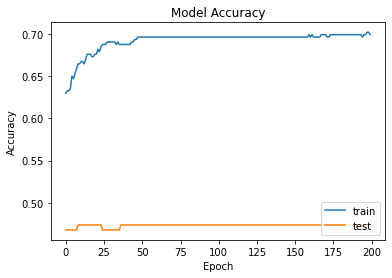

In [55]:
plt.plot(fit_model2.history['accuracy'])
plt.plot(fit_model2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

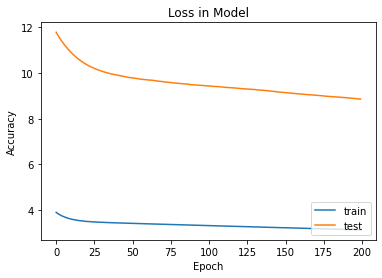

In [56]:
# summarizaion of history for loss
plt.plot(fit_model2.history['loss'])
plt.plot(fit_model2.history['val_loss'])
plt.title('Loss in Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Making Another model with changing Activation functions and Mini-Batch Gradient(optimizer)

In [57]:
# fix random seed for reproducibility
seed3 = 10
np.random.seed(seed3)

In [58]:
# creating model with ["sigmoid" and "logistic"]
model3 = Sequential() # 0 level
model3.add(Dense(14, input_dim=9,  activation='relu')) # FIRST LAYER
model3.add(Dense(9,  activation='sigmoid')) #2nd layer
model3.add(Dense(1, activation='tanh')) #3rd layer or op layer

In [59]:
# Compile model
# chaging optimizer older=adadelta/ada, new=adagrad
model3.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [60]:
# Fit the model
# Change ephocs
fit_model3=model3.fit(X,Y, validation_split=0.33, epochs=300, batch_size=15)

Epoch 1/300
24/24 [==============================] - 3s 62ms/step - loss: 1.9128 - accuracy: 0.2428 - val_loss: 1.6770 - val_accuracy: 0.3158
Epoch 2/300
24/24 [==============================] - 1s 40ms/step - loss: 1.4662 - accuracy: 0.2428 - val_loss: 1.3882 - val_accuracy: 0.3158
Epoch 3/300
24/24 [==============================] - 1s 35ms/step - loss: 1.3982 - accuracy: 0.2399 - val_loss: 1.3326 - val_accuracy: 0.3158
Epoch 4/300
24/24 [==============================] - 1s 38ms/step - loss: 1.3497 - accuracy: 0.2399 - val_loss: 1.2282 - val_accuracy: 0.3158
Epoch 5/300
24/24 [==============================] - 1s 43ms/step - loss: 1.3115 - accuracy: 0.2399 - val_loss: 1.1874 - val_accuracy: 0.3158
Epoch 6/300
24/24 [==============================] - 1s 51ms/step - loss: 1.2798 - accuracy: 0.2399 - val_loss: 1.1576 - val_accuracy: 0.3158
Epoch 7/300
24/24 [==============================] - 1s 51ms/step - loss: 1.2522 - accuracy: 0.2428 - val_loss: 1.1326 - val_accuracy: 0.3158
Epoch 

24/24 [==============================] - 1s 42ms/step - loss: 0.8326 - accuracy: 0.3266 - val_loss: 0.8161 - val_accuracy: 0.3801
Epoch 59/300
24/24 [==============================] - 1s 42ms/step - loss: 0.8301 - accuracy: 0.3324 - val_loss: 0.8139 - val_accuracy: 0.3801
Epoch 60/300
24/24 [==============================] - 1s 34ms/step - loss: 0.8274 - accuracy: 0.3295 - val_loss: 0.8117 - val_accuracy: 0.3801
Epoch 61/300
24/24 [==============================] - 1s 39ms/step - loss: 0.8247 - accuracy: 0.3324 - val_loss: 0.8096 - val_accuracy: 0.3860
Epoch 62/300
24/24 [==============================] - 1s 40ms/step - loss: 0.8221 - accuracy: 0.3324 - val_loss: 0.8075 - val_accuracy: 0.3860
Epoch 63/300
24/24 [==============================] - 1s 37ms/step - loss: 0.8195 - accuracy: 0.3324 - val_loss: 0.8054 - val_accuracy: 0.3860
Epoch 64/300
24/24 [==============================] - 1s 34ms/step - loss: 0.8170 - accuracy: 0.3324 - val_loss: 0.8036 - val_accuracy: 0.3860
Epoch 65/300

24/24 [==============================] - 1s 48ms/step - loss: 0.7307 - accuracy: 0.3382 - val_loss: 0.7346 - val_accuracy: 0.3918
Epoch 116/300
24/24 [==============================] - 1s 49ms/step - loss: 0.7295 - accuracy: 0.3382 - val_loss: 0.7336 - val_accuracy: 0.3918
Epoch 117/300
24/24 [==============================] - 1s 49ms/step - loss: 0.7283 - accuracy: 0.3382 - val_loss: 0.7327 - val_accuracy: 0.3918
Epoch 118/300
24/24 [==============================] - 1s 37ms/step - loss: 0.7271 - accuracy: 0.3382 - val_loss: 0.7317 - val_accuracy: 0.3918
Epoch 119/300
24/24 [==============================] - 1s 37ms/step - loss: 0.7259 - accuracy: 0.3382 - val_loss: 0.7307 - val_accuracy: 0.3918
Epoch 120/300
24/24 [==============================] - 1s 38ms/step - loss: 0.7247 - accuracy: 0.3382 - val_loss: 0.7299 - val_accuracy: 0.3918
Epoch 121/300
24/24 [==============================] - 1s 33ms/step - loss: 0.7236 - accuracy: 0.3382 - val_loss: 0.7290 - val_accuracy: 0.3918
Epoch 

Epoch 172/300
24/24 [==============================] - 1s 37ms/step - loss: 0.6765 - accuracy: 0.3353 - val_loss: 0.6926 - val_accuracy: 0.3860
Epoch 173/300
24/24 [==============================] - 1s 34ms/step - loss: 0.6758 - accuracy: 0.3324 - val_loss: 0.6919 - val_accuracy: 0.3801
Epoch 174/300
24/24 [==============================] - 1s 38ms/step - loss: 0.6751 - accuracy: 0.3324 - val_loss: 0.6914 - val_accuracy: 0.3801
Epoch 175/300
24/24 [==============================] - 1s 36ms/step - loss: 0.6745 - accuracy: 0.3324 - val_loss: 0.6909 - val_accuracy: 0.3801
Epoch 176/300
24/24 [==============================] - 1s 37ms/step - loss: 0.6737 - accuracy: 0.3324 - val_loss: 0.6903 - val_accuracy: 0.3801
Epoch 177/300
24/24 [==============================] - 1s 39ms/step - loss: 0.6731 - accuracy: 0.3324 - val_loss: 0.6898 - val_accuracy: 0.3801
Epoch 178/300
24/24 [==============================] - 1s 37ms/step - loss: 0.6724 - accuracy: 0.3324 - val_loss: 0.6892 - val_accuracy:

Epoch 229/300
24/24 [==============================] - 1s 34ms/step - loss: 0.6427 - accuracy: 0.3237 - val_loss: 0.6674 - val_accuracy: 0.3743
Epoch 230/300
24/24 [==============================] - 1s 36ms/step - loss: 0.6423 - accuracy: 0.3237 - val_loss: 0.6671 - val_accuracy: 0.3743
Epoch 231/300
24/24 [==============================] - 1s 37ms/step - loss: 0.6417 - accuracy: 0.3237 - val_loss: 0.6667 - val_accuracy: 0.3743
Epoch 232/300
24/24 [==============================] - 1s 36ms/step - loss: 0.6412 - accuracy: 0.3266 - val_loss: 0.6664 - val_accuracy: 0.3743
Epoch 233/300
24/24 [==============================] - 1s 35ms/step - loss: 0.6408 - accuracy: 0.4422 - val_loss: 0.6661 - val_accuracy: 0.6901
Epoch 234/300
24/24 [==============================] - 1s 36ms/step - loss: 0.6404 - accuracy: 0.7717 - val_loss: 0.6657 - val_accuracy: 0.6901
Epoch 235/300
24/24 [==============================] - 1s 51ms/step - loss: 0.6399 - accuracy: 0.7717 - val_loss: 0.6654 - val_accuracy:

Epoch 286/300
24/24 [==============================] - 1s 37ms/step - loss: 0.6190 - accuracy: 0.7717 - val_loss: 0.6499 - val_accuracy: 0.6901
Epoch 287/300
24/24 [==============================] - 1s 38ms/step - loss: 0.6187 - accuracy: 0.7717 - val_loss: 0.6496 - val_accuracy: 0.6901
Epoch 288/300
24/24 [==============================] - 1s 35ms/step - loss: 0.6183 - accuracy: 0.7717 - val_loss: 0.6493 - val_accuracy: 0.6901
Epoch 289/300
24/24 [==============================] - 1s 41ms/step - loss: 0.6180 - accuracy: 0.7717 - val_loss: 0.6490 - val_accuracy: 0.6901
Epoch 290/300
24/24 [==============================] - 1s 39ms/step - loss: 0.6176 - accuracy: 0.7717 - val_loss: 0.6487 - val_accuracy: 0.6901
Epoch 291/300
24/24 [==============================] - 1s 37ms/step - loss: 0.6173 - accuracy: 0.7717 - val_loss: 0.6484 - val_accuracy: 0.6901
Epoch 292/300
24/24 [==============================] - 1s 48ms/step - loss: 0.6170 - accuracy: 0.7717 - val_loss: 0.6481 - val_accuracy:

In [61]:
# Evaluating the Model
score3 = model3.evaluate(X,Y)
print("%s: %.2f%%" % (model3.metrics_names[1], score3[1]*100))

17/17 [==============================] - 1s 2ms/step - loss: 0.6246 - accuracy: 0.7447
accuracy: 74.47%


In [62]:
# Visualzation of Training History, metric name and score
model3.metrics_names, score3 , fit_model3.history.keys()

(['loss', 'accuracy'],
 [0.6245949864387512, 0.7446808218955994],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

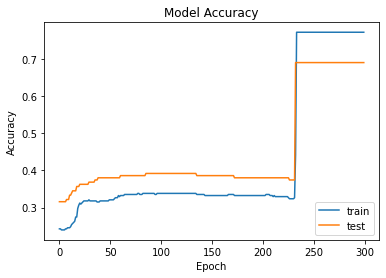

In [63]:
# summarizaion of history for accuracy
plt.plot(fit_model3.history['accuracy'])
plt.plot(fit_model3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

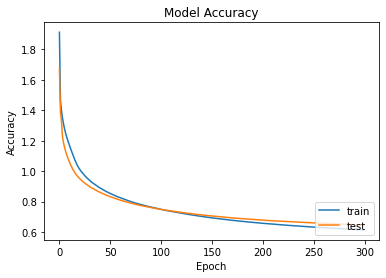

In [64]:
# summarizaion of history for loss
plt.plot(fit_model3.history['loss'])
plt.plot(fit_model3.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

#  Decision Tree


In [65]:
ffire['size_category'].unique()

array([1, 0])

In [66]:
x = ffire.iloc[:,2:-1]
y = ffire.iloc[:,-1]
print(y)
x

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [67]:
# Splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

# Building Decision Tree Classifier Using Entropy Criteria

In [68]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

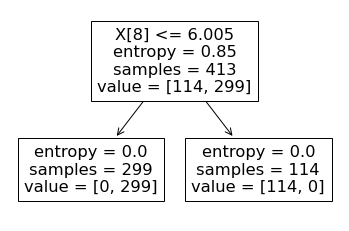

In [69]:
#Plot the Decision Tree
from sklearn import tree
tree.plot_tree(model);

In [70]:
y_train.value_counts().keys()

Int64Index([1, 0], dtype='int64')

In [71]:
ffire.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

In [72]:
ffire['size_category'].value_counts()

1    378
0    139
Name: size_category, dtype: int64

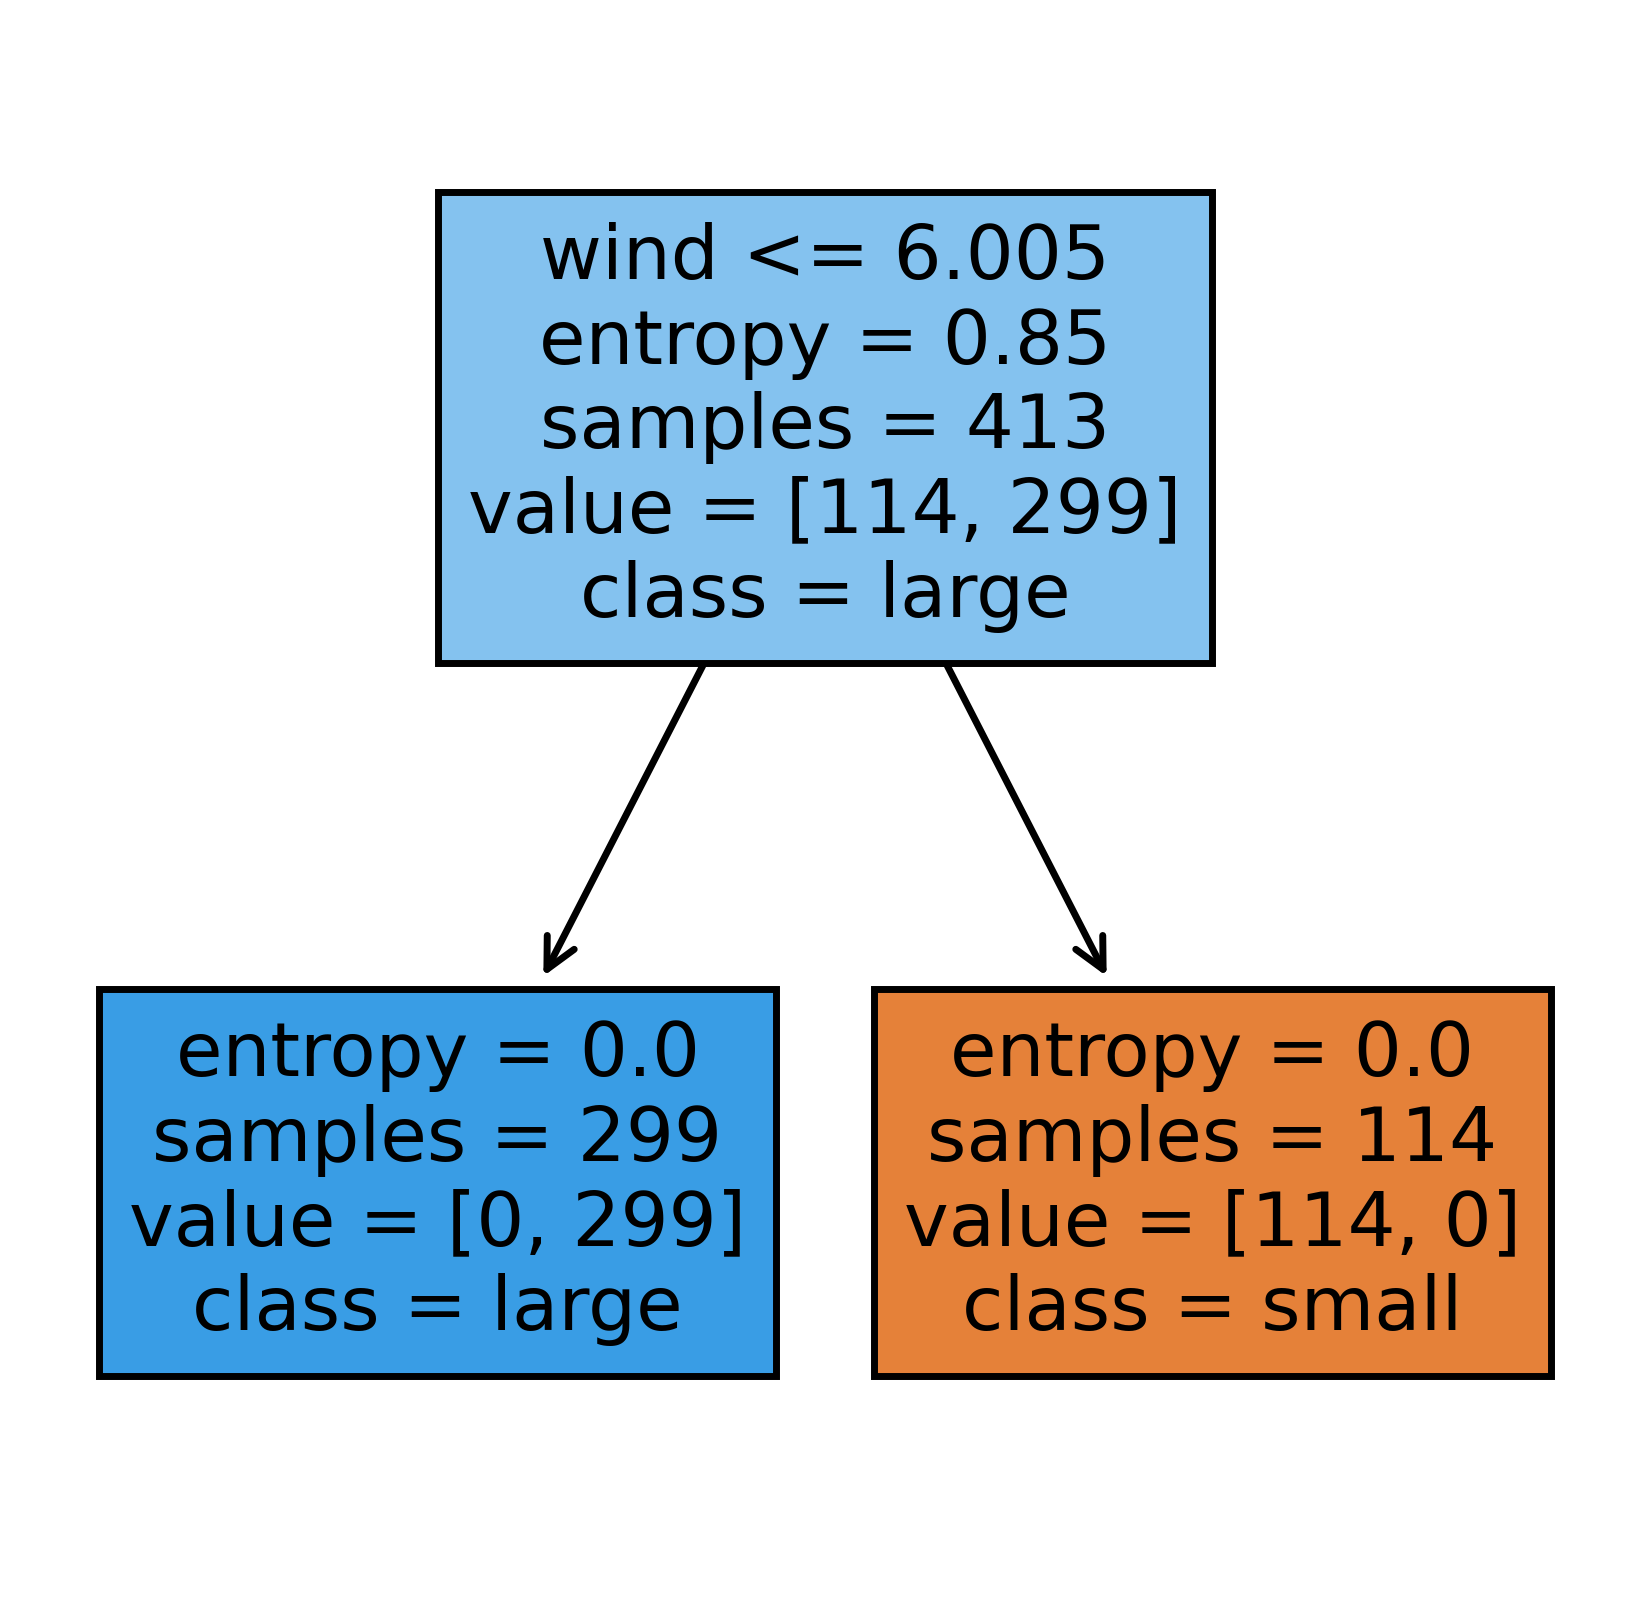

In [73]:
import matplotlib.pyplot as plt
from sklearn import tree
col = ['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area']
cn = ['small', 'large']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)
tree.plot_tree(model, feature_names = col, class_names = cn, filled = True)
plt.show()

In [74]:
# Predicting on test data
preds = model.predict(x_test)   # Predicting on test data set
pd.Series(preds).value_counts()   #Getting the count of each category

1    79
0    25
dtype: int64

In [75]:
y_test.value_counts()

1    79
0    25
Name: size_category, dtype: int64

In [76]:
preds

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [77]:
pd.crosstab(y_test, preds)  # Getting the 2 way table to understand the correct and wrong predictions. 

col_0,0,1
size_category,,
0,25,0
1,0,79


In [78]:
preds, y_test

(array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1]),
 429    1
 48     1
 321    0
 332    0
 380    0
       ..
 335    1
 82     1
 18     1
 169    1
 507    1
 Name: size_category, Length: 104, dtype: int32)

In [79]:
#Accuracy
from sklearn.metrics import accuracy_score
import numpy as np

np.mean(preds == y_test), accuracy_score(y_test, preds)

(1.0, 1.0)

# Building Decision Tree Classifier (CART) using Gini Criteria

In [80]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [81]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [82]:
# Prediction and Computing the accuracy
pred = model.predict(x_test)
np.mean(preds == y_test)

1.0

# Decision Tree Regression Example

In [83]:
# Decision tree Regression
from sklearn.tree import DecisionTreeRegressor

In [84]:
array = ffire.values
X = array[:,:-1]
Y = array[:,-1]
print(X)
print(Y)

[[ 7.    0.   86.2  ...  6.7   0.    0.  ]
 [10.    5.   90.6  ...  0.9   0.    0.  ]
 [10.    2.   90.6  ...  1.3   0.    0.  ]
 ...
 [ 1.    3.   81.6  ...  6.7   0.   11.16]
 [ 1.    2.   94.4  ...  4.    0.    0.  ]
 [ 9.    5.   79.5  ...  4.5   0.    0.  ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1.

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)

In [86]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [87]:
# Find The Accuracy
model.score(X_test, Y_test)

1.0

# Logistic Regression
 

In [88]:
from sklearn.linear_model import LogisticRegression
import pickle

In [89]:
## we already Divided dataset into input and output(I.e. model building is done)
# model fitting
classifier = LogisticRegression()
classifier.fit(X,Y)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [91]:
# Predict for X dataset
pickle.load(open(filename, 'rb'))
y_pred = classifier.predict(X)

In [92]:
y_pred_ffire = pd.DataFrame({'actual': Y, 'predicted_prob': classifier.predict(X)})

In [93]:
y_pred_ffire

,actual,predicted_prob
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
512,0.0,0.0
513,0.0,0.0
514,0.0,0.0
515,1.0,1.0


In [94]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y, y_pred)
print(confusion_matrix)

[[138   1]
 [  0 378]]


In [95]:
((138+378)/(138+1+0+378))*100

99.80657640232108

In [96]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       139
         1.0       1.00      1.00      1.00       378

    accuracy                           1.00       517
   macro avg       1.00      1.00      1.00       517
weighted avg       1.00      1.00      1.00       517



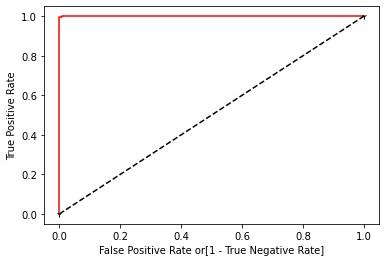

In [97]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, y_pred)

plt.plot(fpr, tpr, color = 'red', label = 'logit model(area = %0.2f)' %auc)
plt.plot([0,1], [0,1], 'k--1')
plt.xlabel('False Positive Rate or[1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [98]:
auc*100   # Accuracy

99.64028776978418

# KNN Classification

In [99]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [100]:
kfold = KFold(n_splits = 10)

In [101]:
model = KNeighborsClassifier(n_neighbors = 12)
results = cross_val_score(model, X, Y, cv = kfold)
print(results)
print("Accuracy is: ", results.mean()*100)

[0.98076923 0.98076923 0.98076923 0.5        0.63461538 0.69230769
 0.78846154 0.64705882 0.7254902  0.70588235]
Accuracy is:  76.36123680241327


In [102]:
# Grid Search for algorithm tuning
from sklearn.model_selection import GridSearchCV
import numpy as np
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [103]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [104]:
print(grid.best_score_)

0.7620799103808813


# SVC

In [105]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [106]:
# Take a sample of data set for training and testing.
array = ffire.values
X = array[:,2:-1]
Y = array[:,-1]
print(X)
print(Y)

[[ 86.2   26.2   94.3  ...   6.7    0.     0.  ]
 [ 90.6   35.4  669.1  ...   0.9    0.     0.  ]
 [ 90.6   43.7  686.9  ...   1.3    0.     0.  ]
 ...
 [ 81.6   56.7  665.6  ...   6.7    0.    11.16]
 [ 94.4  146.   614.7  ...   4.     0.     0.  ]
 [ 79.5    3.   106.7  ...   4.5    0.     0.  ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [107]:
ffire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int32  
 1   day            517 non-null    int32  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    int32  
dtypes: float64(8), int32(3), int64(1)
memory usage: 42.5 KB


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Creating training and test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [109]:
# Training a SVM classifier using SVC class
svm = SVC(kernel = 'linear', random_state = 1, C = 0.1)
svm.fit(X_train_std, Y_train)

SVC(C=0.1, kernel='linear', random_state=1)

In [110]:
# Mode performance
y_pred = svm.predict(X_test_std)
print("Accuracy: %.3f" % accuracy_score(Y_test, y_pred))

Accuracy: 0.788


# Accuracy is very small so we predict model using SVM.
# SVM

In [111]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [113]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((413, 9), (104, 9), (413,), (104,))

In [114]:
SVMC = SVC(random_state = 42)
svc_param_grid = {'kernel' : ['rbf', 'sigmoid', 'poly', 'linear'], 'gamma': [1,0.1,0.01,0.001], 'C': [1000,100,10,1], 'tol': [0.001,0.0008,0.0009,0.0011]}
gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = 10, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsSVMC.fit(X_train, Y_train)

svm_best = gsSVMC.best_estimator_

gsSVMC.best_score_

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


0.9861861861861861

In [115]:
# Or 2) Grid Search CV
clf = SVC()
param_grid = [{'kernel': ['linear', 'rbf'], 'gamma': [0.5,0.1,0.1], 'C': [10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf, param_grid, cv = 10, verbose = 30)
gsv.fit(X_train, Y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 1/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.973 total time=   1.5s
[CV 2/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 2/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 3/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.972 total time=   0.0s
[CV 4/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 4/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   0.1s
[CV 5/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 5/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.972 total time=   0.0s
[CV 6/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 6/10; 1/24] END C=10, gamma

[CV 3/10; 6/24] END C=10, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 4/10; 6/24] START C=10, gamma=0.1, kernel=rbf...............................
[CV 4/10; 6/24] END C=10, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 5/10; 6/24] START C=10, gamma=0.1, kernel=rbf...............................
[CV 5/10; 6/24] END C=10, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 6/10; 6/24] START C=10, gamma=0.1, kernel=rbf...............................
[CV 6/10; 6/24] END C=10, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 7/10; 6/24] START C=10, gamma=0.1, kernel=rbf...............................
[CV 7/10; 6/24] END C=10, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 8/10; 6/24] START C=10, gamma=0.1, kernel=rbf...............................
[CV 8/10; 6/24] END C=10, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 9/10; 6/24] START C=10, gamma=0.1, kernel=rbf...............................
[CV 9/10; 6/24] END C=10, ga

[CV 8/10; 11/24] END C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 9/10; 11/24] START C=0.1, gamma=0.1, kernel=linear..........................
[CV 9/10; 11/24] END C=0.1, gamma=0.1, kernel=linear;, score=0.972 total time=   0.0s
[CV 10/10; 11/24] START C=0.1, gamma=0.1, kernel=linear.........................
[CV 10/10; 11/24] END C=0.1, gamma=0.1, kernel=linear;, score=0.972 total time=   0.0s
[CV 1/10; 12/24] START C=0.1, gamma=0.1, kernel=rbf.............................
[CV 1/10; 12/24] END C=0.1, gamma=0.1, kernel=rbf;, score=0.730 total time=   0.0s
[CV 2/10; 12/24] START C=0.1, gamma=0.1, kernel=rbf.............................
[CV 2/10; 12/24] END C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 3/10; 12/24] START C=0.1, gamma=0.1, kernel=rbf.............................
[CV 3/10; 12/24] END C=0.1, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 4/10; 12/24] START C=0.1, gamma=0.1, kernel=rbf.............................
[CV 4/

[CV 5/10; 17/24] END C=0.001, gamma=0.1, kernel=linear;, score=0.917 total time=   0.0s
[CV 6/10; 17/24] START C=0.001, gamma=0.1, kernel=linear........................
[CV 6/10; 17/24] END C=0.001, gamma=0.1, kernel=linear;, score=0.944 total time=   0.0s
[CV 7/10; 17/24] START C=0.001, gamma=0.1, kernel=linear........................
[CV 7/10; 17/24] END C=0.001, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 8/10; 17/24] START C=0.001, gamma=0.1, kernel=linear........................
[CV 8/10; 17/24] END C=0.001, gamma=0.1, kernel=linear;, score=0.972 total time=   0.0s
[CV 9/10; 17/24] START C=0.001, gamma=0.1, kernel=linear........................
[CV 9/10; 17/24] END C=0.001, gamma=0.1, kernel=linear;, score=0.917 total time=   0.0s
[CV 10/10; 17/24] START C=0.001, gamma=0.1, kernel=linear.......................
[CV 10/10; 17/24] END C=0.001, gamma=0.1, kernel=linear;, score=0.889 total time=   0.0s
[CV 1/10; 18/24] START C=0.001, gamma=0.1, kernel=rbf.............

[CV 8/10; 22/24] START C=0.0001, gamma=0.1, kernel=rbf..........................
[CV 8/10; 22/24] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 9/10; 22/24] START C=0.0001, gamma=0.1, kernel=rbf..........................
[CV 9/10; 22/24] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.722 total time=   0.0s
[CV 10/10; 22/24] START C=0.0001, gamma=0.1, kernel=rbf.........................
[CV 10/10; 22/24] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.722 total time=   0.0s
[CV 1/10; 23/24] START C=0.0001, gamma=0.1, kernel=linear.......................
[CV 1/10; 23/24] END C=0.0001, gamma=0.1, kernel=linear;, score=0.811 total time=   0.0s
[CV 2/10; 23/24] START C=0.0001, gamma=0.1, kernel=linear.......................
[CV 2/10; 23/24] END C=0.0001, gamma=0.1, kernel=linear;, score=0.944 total time=   0.0s
[CV 3/10; 23/24] START C=0.0001, gamma=0.1, kernel=linear.......................
[CV 3/10; 23/24] END C=0.0001, gamma=0.1, kernel=linear;, score=0.833 total t

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.1],
                          'kernel': ['linear', 'rbf']}],
             verbose=30)

In [116]:
gsv.best_params_, gsv.best_score_

({'C': 10, 'gamma': 0.5, 'kernel': 'linear'}, 0.9861861861861861)

In [117]:
clf = SVC(kernel = 'linear', C = 10)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy is: ", acc)
confusion_matrix(Y_test, y_pred)

Accuracy is:  99.35897435897436


array([[ 45,   1],
       [  0, 110]], dtype=int64)

In [118]:
((45+110)/(45+0+1+110))*100

99.35897435897436